In [34]:
"""
Created on Tue Jun 07 13:56:27 2016
@author: Dalibor Hrg
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pylab import figure, plot, xlabel, ylabel, grid, hold, legend, title, savefig
from scipy.integrate import odeint
from matplotlib.font_manager import FontProperties


def Model(state, t):
    
    #Activator's transcript, unfolded and folded protein 
    mA = state[0]
    Au = state[1]
    Af = state[2]
    #Repressor's transcript, unfolded and folded protein
    mB = state[3]
    Bu = state[4]
    Bf = state[5]
    #miRNA inactive form
    miR0 = state[6]
    #miRNa active form
    miR1 = state[7]
    repressor = state[8]
    
    #Constants
    alpha0 = 0.0015
    alpha = 0.075 
    v_A = 0.6           #activator protein translation rate
    v_B = 0.6           #repressor protein translation rate
    gamma_mA = 0.0101   #activator mRNA degradation rate
    gamma_A = 0.01      #activator protein degradation rate
    gamma_mB = 0.023    #repressor mRNA degradation rate
    gamma_B = 0.023     #repressor protein degradation rate
    gamma_miR0 = 0.00048#inactive form miR223 degradation rate
    gamma_miR1 = 0.007  #active form miR223 degradation rate
    K_A = 3
    K_B = 2
    K_R = 2
    K_D = 0.025         #folding rate of miR223
    K_F = 0.00124       #general protein folding rate
    n_A = 3             #Hill constant for activator 
    n_B = 3             #Hill constant for repressor
    n_R = state [9]     #Hill constant in RNAi silencing
    lambda_max = 0.18   #maximal rate of RNAi silencing    
    
    #State derivatives
    #Activator's transcription regulation, translation to unfolded Au, and folding to Af state
    mAd = alpha0 + alpha * ((Af/K_A)**n_A/(1+(Af/K_A)**n_A)) * (1/(1+repressor*(Bf/K_B)**n_B)) - mA*gamma_mA - mA*lambda_max*((miR1/K_R)**n_R)/(1+(miR1/K_R)**n_R)
    Aud = v_A * mA - Au * gamma_A - K_F * Au
    Afd = K_F * Au - gamma_A * Af 
    #Repressors's transcription regulation, translation to unfolded Bu, and folding to Bf state
    mBd = alpha0 + alpha * ((Af/K_A)**n_A/(1+(Af/K_A)**n_A)) - mB*gamma_mB
    Bud = v_B * mB - Bu * gamma_B - K_F * Bu 
    Bfd = K_F * Bu - gamma_B * Bf
    
    miR0d = alpha0 + alpha*((Af/K_A)**n_A/(1+(Af/K_A)**n_A)) - miR0*gamma_miR0 - K_D*miR0
    miR1d = K_D*miR0 - miR1*gamma_miR1
    
    repressord = 0
    n_Rd = 0
    
    # return the state derivatives
    return [mAd, Aud, Afd, mBd, Bud, Bfd, miR0d, miR1d, repressord, n_Rd]


In [35]:
#Initial conditions and simulation time duration
state0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
t = np.arange(0.0, 6000, 0.1)
stateNR = odeint(Model, state0, t)
state0 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 4]
stateWR = odeint(Model, state0, t)

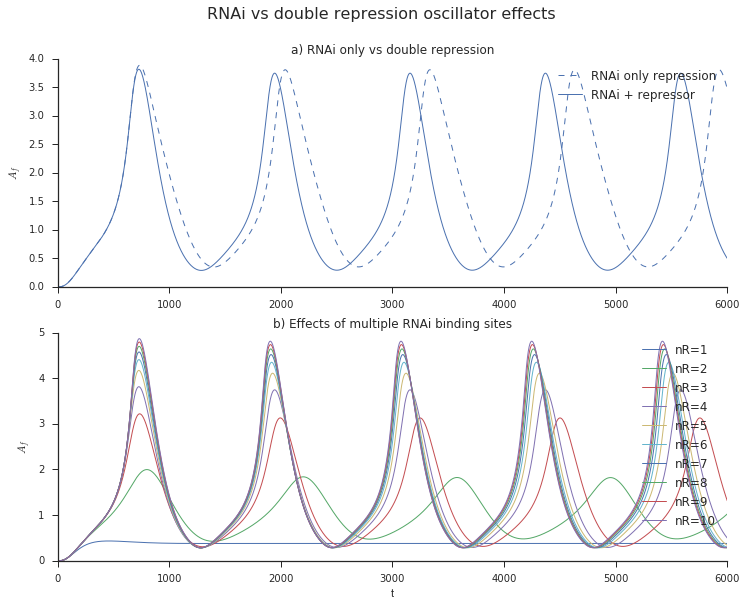

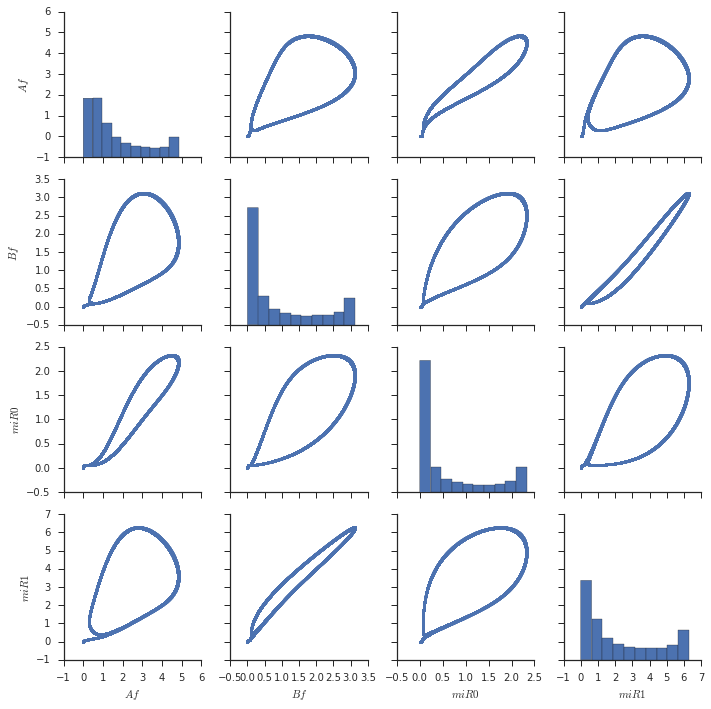

In [36]:
fig = plt.figure(1, figsize=(12, 9), dpi = 200)

fig.suptitle('RNAi vs double repression oscillator effects\n', fontsize=16)
grid(True)
hold(True)
ax = plt.subplot(211)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.tick_params(top="off")
ax.tick_params(right="off")
ylabel("$A_f$")
ax.set_title("a) RNAi only vs double repression")
ax.plot(t, stateNR[:,2], 'b--', linewidth=1)
ax.plot(t, stateWR[:,2], 'b', linewidth=1)
ax.legend(('RNAi only repression', 'RNAi + repressor'), prop=FontProperties(size=12))


ax = plt.subplot(212)
xlabel('t')
ylabel("$A_f$")
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.tick_params(top="off")
ax.tick_params(right="off")
ax.set_title("b) Effects of multiple RNAi binding sites")

n_R_list = [1,2,3,4,5,6,7,8,9,10]
for n_R in n_R_list:
    state0 = [0, 0, 0, 0, 0, 0, 0, 0, 1, n_R]
    stateWR = odeint(Model, state0, t)
    ax.plot(t, stateWR[:,2], linewidth=1, label='nR=%s' % n_R)
    
ax.legend(prop=FontProperties(size=12))

import seaborn as sns
from pandas import DataFrame
from numpy.random import randn
sns.set(style="ticks", color_codes=True)

df = sns.load_dataset("titanic")
#a=np.array([state[:, 0], state[:, 1], state[:, 2]])
#dff = DataFrame(state[:,[0,1]], columns=['x', 'y'])
dff = DataFrame(stateWR[:,[2,5,6,7]], columns=['$Af$','$Bf$','$miR0$','$miR1$'])
snsplot = sns.pairplot(dff, diag_kind="hist", plot_kws=dict(s=1, edgecolor="b", linewidth=1)) 

#snsplot.savefig("oscillator.png", dpi=300)